# Underfitting vs. Overfitting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [8]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

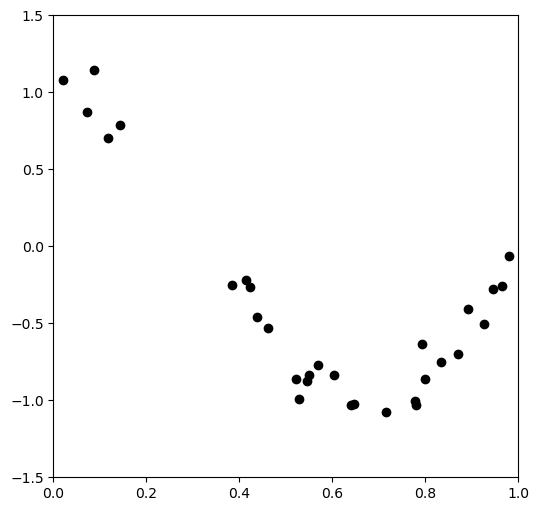

In [9]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

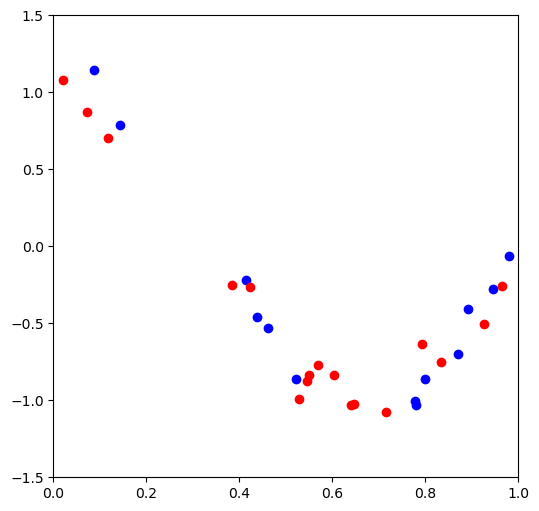

In [10]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics
from sklearn import linear_model

In [21]:
X1=np.vstack(X1)
X2=np.vstack(X2)
model1 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model1.fit(X1, y1)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])

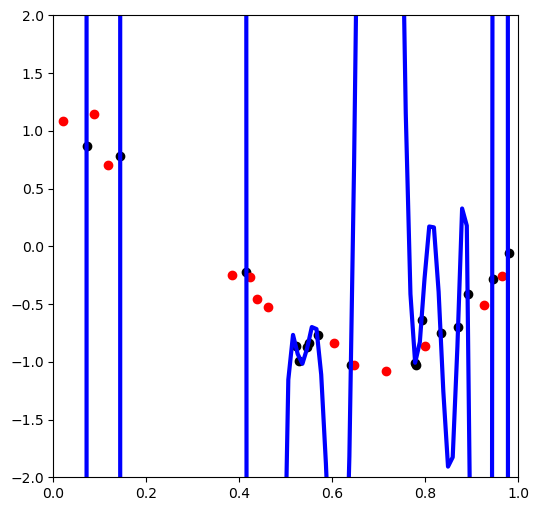

R^2: -7136394625938.78


In [22]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-2,2])
plt.scatter(X1, y1,  color='black')
plt.scatter(X2, y2,  color='red')
x_plot = np.vstack(np.linspace(0, 1, 100))
plt.plot(x_plot, model1.predict(x_plot), color='blue',linewidth=3)
plt.show()
print("R^2: {}".format(metrics.r2_score(y2, model1.predict(X2))))

In [23]:
model2 = linear_model.LinearRegression()
model2.fit(X1, y1);

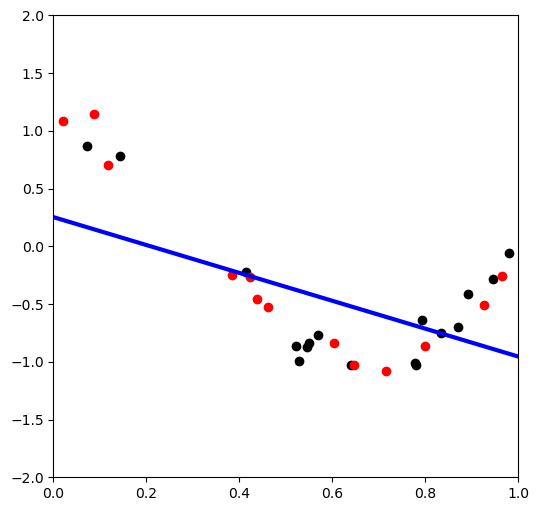

R^2: -7136394625938.78


In [24]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-2,2])
plt.scatter(X1, y1,  color='black')
plt.scatter(X2, y2,  color='red')
x_plot = np.vstack(np.linspace(0, 1, 100))
plt.plot(x_plot, model2.predict(x_plot), color='blue',linewidth=3)
plt.show()
print("R^2: {}".format(metrics.r2_score(y2, model1.predict(X2))))

# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.


In [25]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

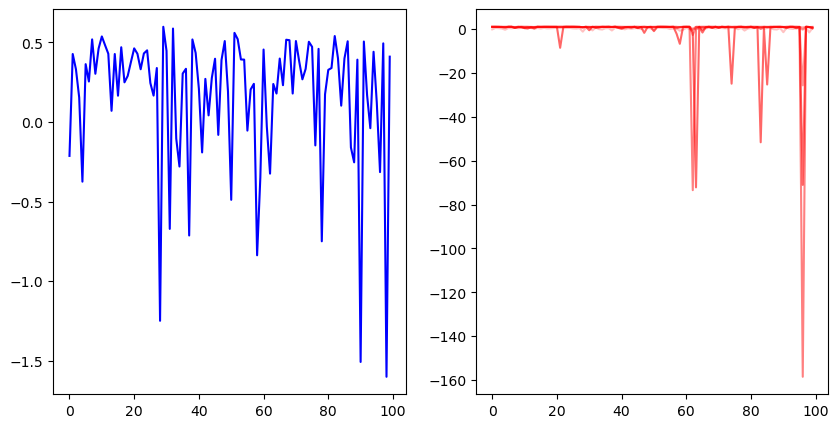

In [42]:
linear_model_r2s = []
polynomial_models_R2s = [[] for i in range(6)]
for i in range(100):
    s=np.random.random_sample(n_samples)
    s[s>0.5]=1
    s[s<=0.5]=0
    X1=X[s==1]
    y1=y[s==1]
    X2=X[s==0]
    y2=y[s==0]
    X1=np.vstack(X1)
    X2=np.vstack(X2)

    model = linear_model.LinearRegression()
    model.fit(X1, y1)
    R2 = metrics.r2_score(y2, model.predict(X2))
    linear_model_r2s.append(R2)
    
    for deg in range(1, 7):
        model = make_pipeline(PolynomialFeatures(deg), linear_model.LinearRegression())
        model.fit(X1, y1)
        R2 = metrics.r2_score(y2, model.predict(X2))
        polynomial_models_R2s[deg-1].append(R2)

fig, axes = plt.subplots(1,2, figsize=(10, 5))
axes[0].plot(linear_model_r2s,  color='blue')
a = 0.2
for deg_R2 in polynomial_models_R2s:
    a *= 1.2
    axes[1].plot(deg_R2, color='red', alpha=a)
plt.show()
